In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np

In [4]:
import seaborn as sns

In [5]:
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, ShuffleSplit
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import learning_curve

In [6]:
data=pd.read_csv('fetal dataset.csv')

In [7]:
# Detecting and handling duplicates
duplicates = data.copy()
duplicates.drop_duplicates(inplace=True)
print('Total number of duplicates are:', data.shape[0] - duplicates.shape[0])
data = duplicates.copy()

Total number of duplicates are: 13


In [8]:
# First five rows of the dataset
data.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,severe_decelerations.1,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120,0.000,0.0,0.000,0.000,0.0,1.0,73,0.5,43,...,62,126,2,0,120,137,121,73,1,2
1,132,0.006,0.0,0.006,0.003,0.0,1.0,17,2.1,0,...,68,198,6,1,141,136,140,12,0,1
2,133,0.003,0.0,0.008,0.003,0.0,1.0,16,2.1,0,...,68,198,5,1,141,135,138,13,0,1
3,134,0.003,0.0,0.008,0.003,0.0,1.0,16,2.4,0,...,53,170,11,0,137,134,137,13,1,1
4,132,0.007,0.0,0.008,0.000,0.0,1.0,16,2.4,0,...,53,170,9,0,137,136,138,11,1,1


In [9]:
# Size of the dataset
data.shape

(2113, 22)

In [10]:
# Columns of the dataset
data.columns

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'severe_decelerations.1', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

In [11]:
# Description of the dataset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2113.0,133.304780,9.837451,106.0,126.000,133.000,140.000,160.000
accelerations,2113.0,0.003188,0.003871,0.0,0.000,0.002,0.006,0.019
fetal_movement,2113.0,0.009517,0.046804,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2113.0,0.004387,0.002941,0.0,0.002,0.005,0.007,0.015
light_decelerations,2113.0,0.001901,0.002966,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2113.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
severe_decelerations.1,2113.0,1.000003,0.000057,1.0,1.000,1.000,1.000,1.001
abnormal_short_term_variability,2113.0,46.993848,17.177782,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2113.0,1.335021,0.884368,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2113.0,9.795078,18.337073,0.0,0.000,0.000,11.000,91.000


In [12]:
# Shows coloumns, number of non-null values and its data types
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 2113 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2113 non-null   int64  
 1   accelerations                                           2113 non-null   float64
 2   fetal_movement                                          2113 non-null   float64
 3   uterine_contractions                                    2113 non-null   float64
 4   light_decelerations                                     2113 non-null   float64
 5   severe_decelerations                                    2113 non-null   float64
 6   severe_decelerations.1                                  2113 non-null   float64
 7   abnormal_short_term_variability                         2113 non-null   int64  
 8   mean_value_of_short_term_variability       

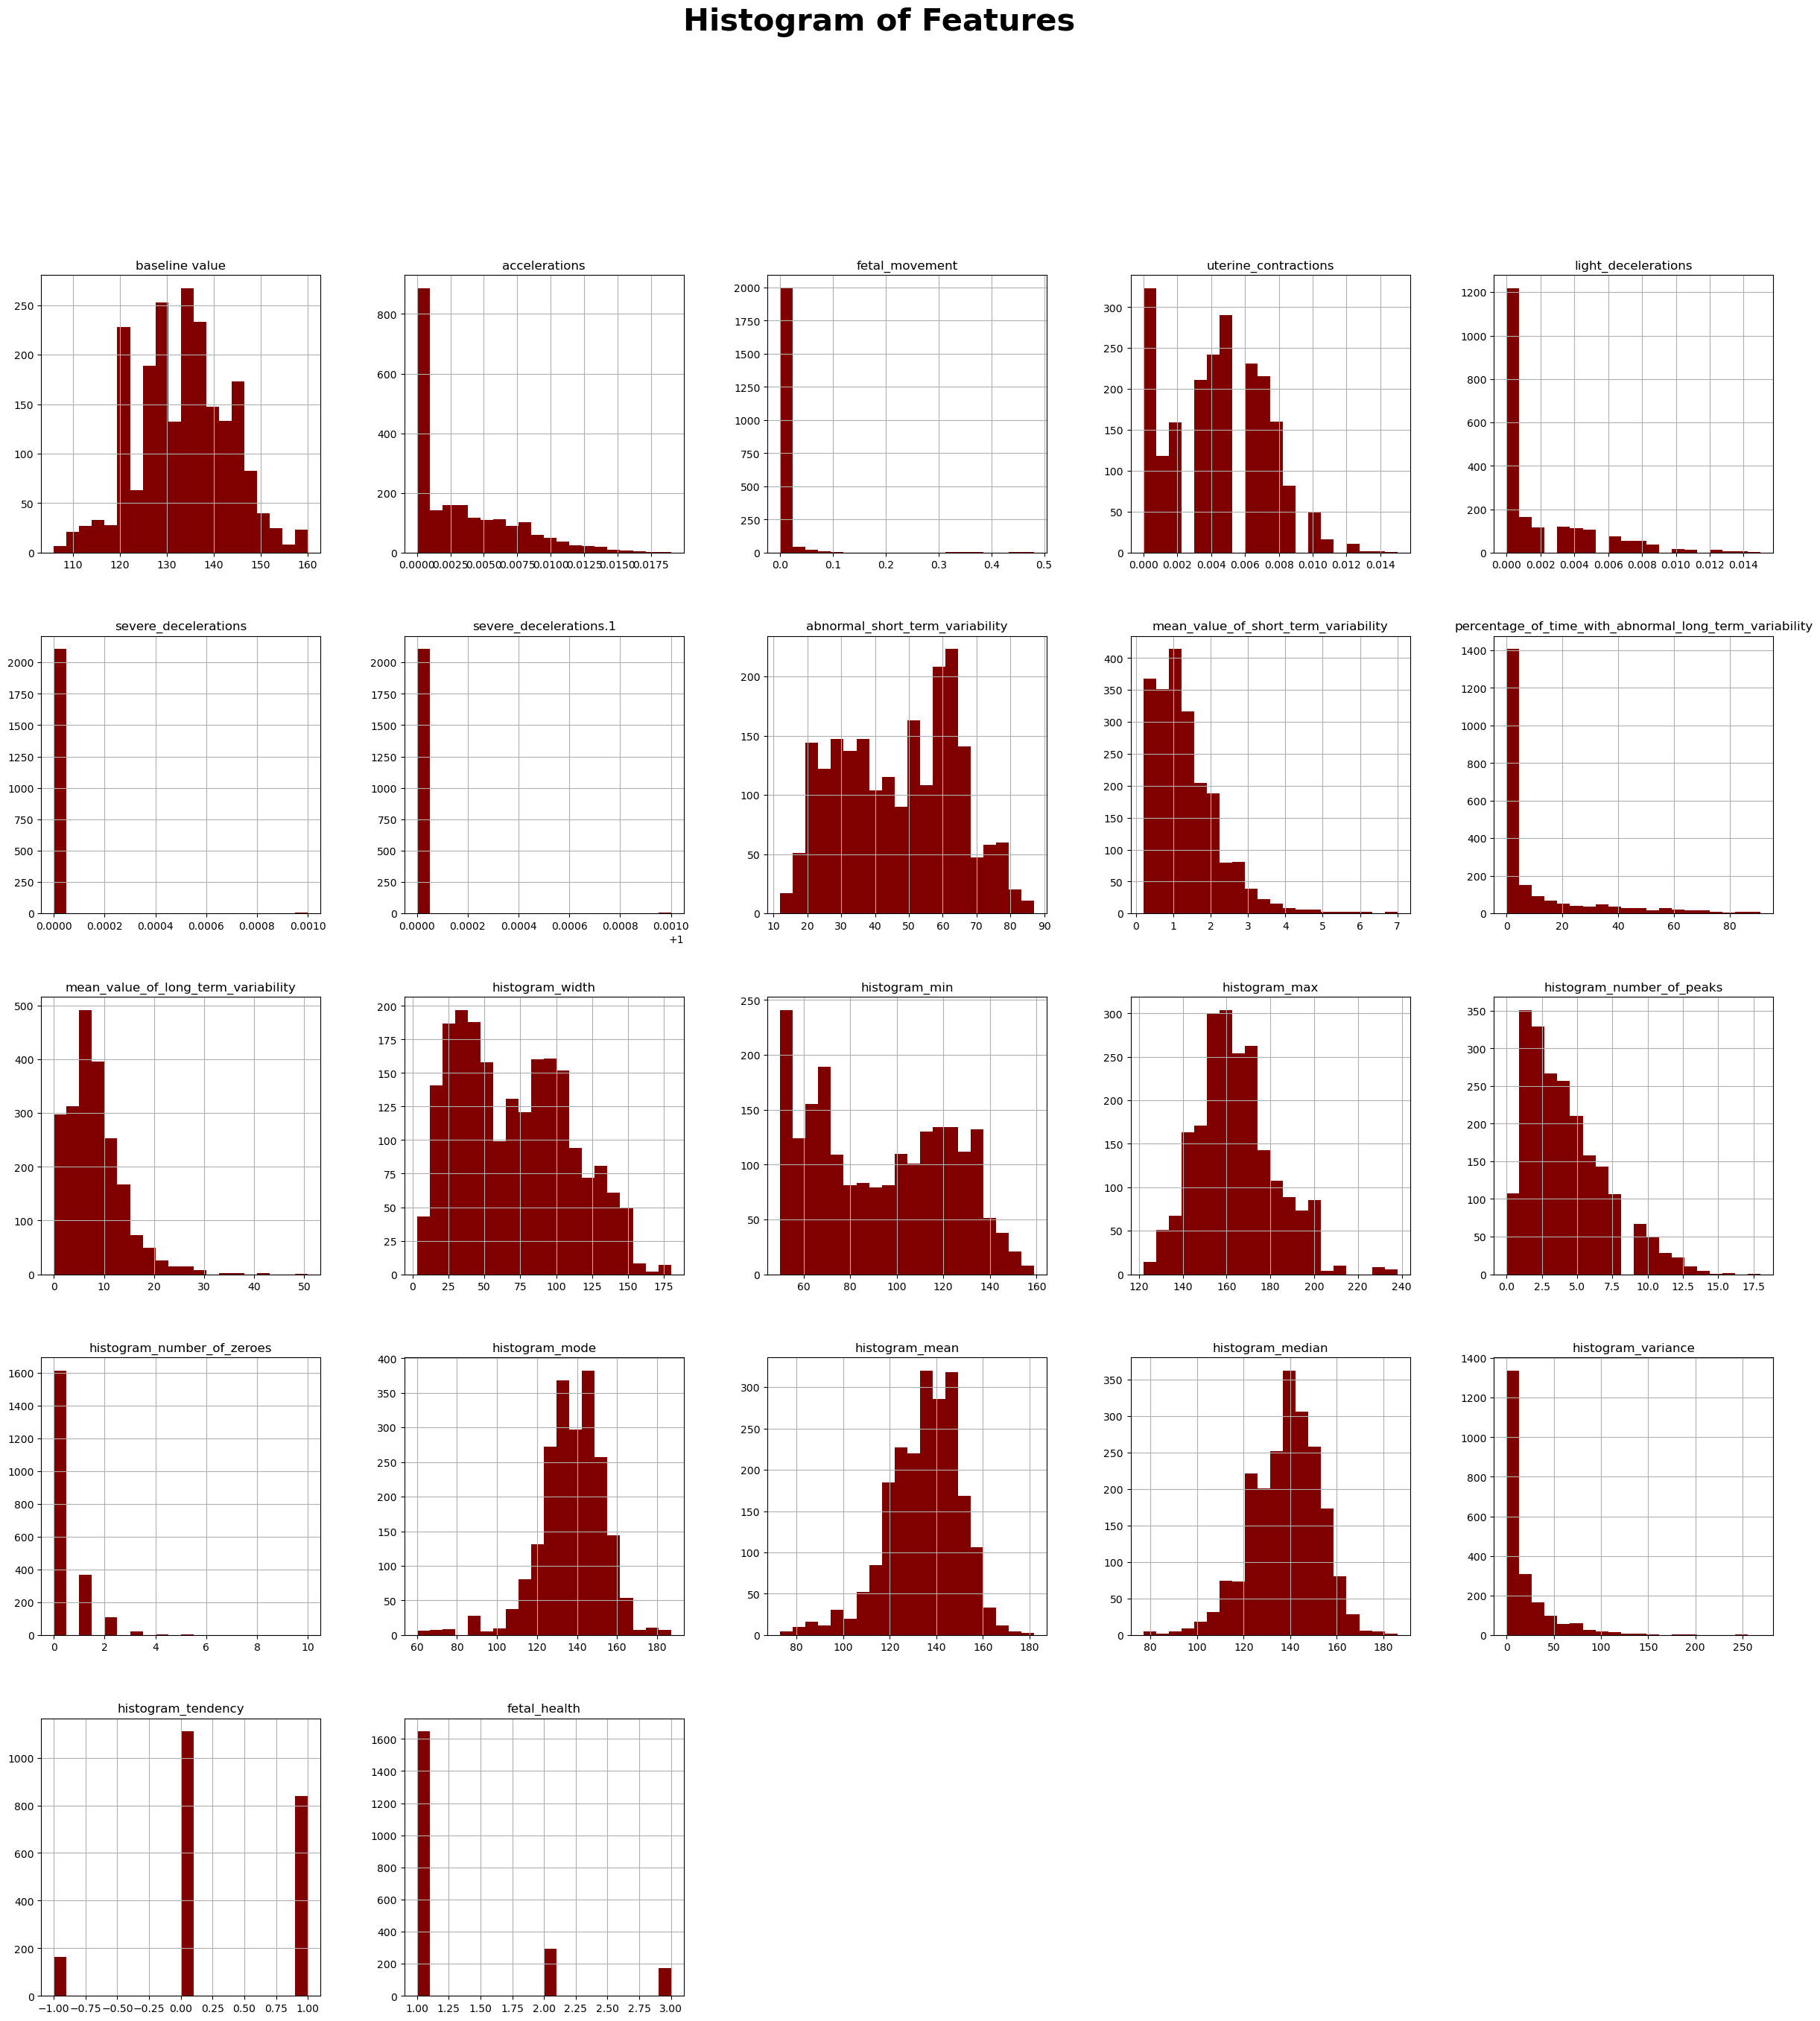

In [13]:
# Plot histogram for the features
data.hist(bins=20, figsize=(30, 30), color='maroon', grid=True)
hist_features = plt.suptitle('Histogram of Features',
                             y=1,
                             fontsize=30,
                             fontweight='bold')

Text(0, 0.5, 'Count')

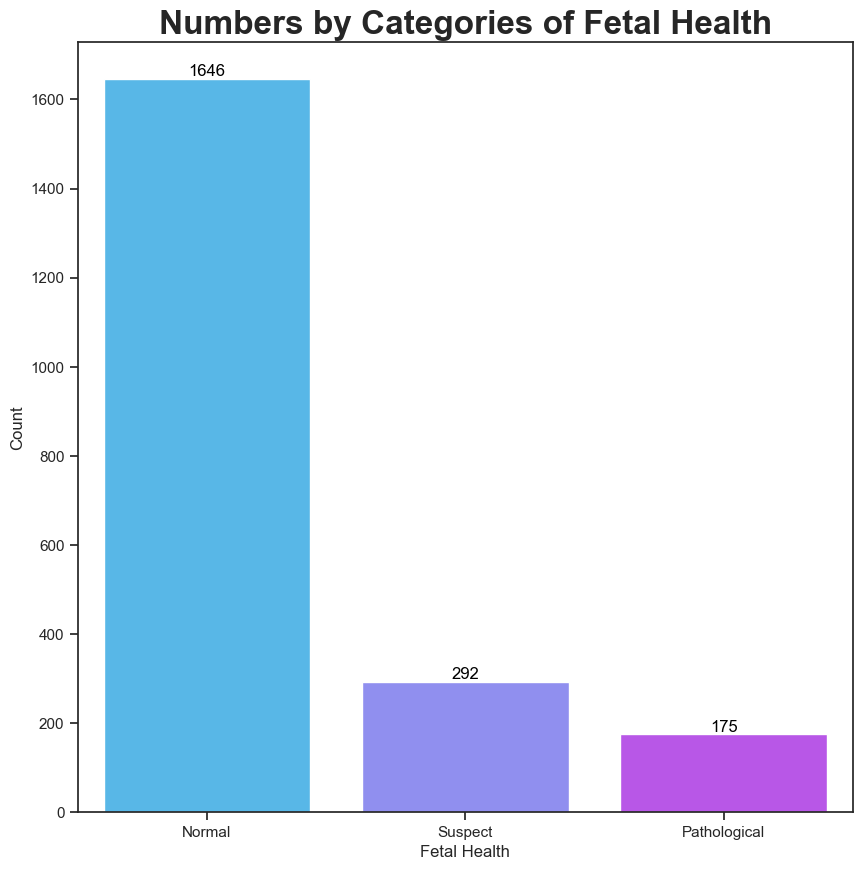

In [14]:
# Quantitative distribution histogram according to fetal health status
sns.set(style='ticks')
plt.figure(figsize=(10, 10))
fh_status = sns.countplot(x='fetal_health', data=data, palette='cool')

for number, count in enumerate(data['fetal_health'].value_counts()):
    fh_status.text(number, count, str(count), ha='center', va='bottom', fontsize=12, color='black')
    
plt.title('Numbers by Categories of Fetal Health',
          fontsize=24,
          fontweight='bold')

plt.xticks([0, 1, 2], ['Normal', 'Suspect', 'Pathological'])
plt.xlabel('Fetal Health')
plt.ylabel('Count')

Text(0.5, 1.0, 'Pie chart by fetal health')

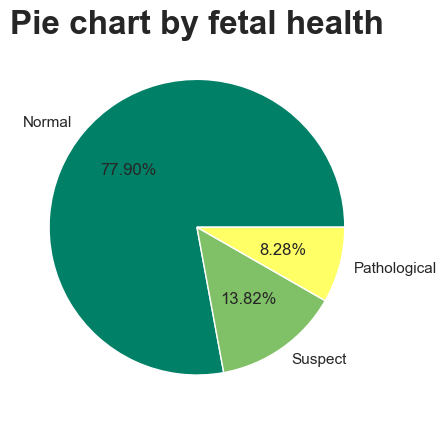

In [15]:
# Percentage representation according to fetal health status
normal = (data['fetal_health'] == 1.0).sum()
suspect = (data['fetal_health'] == 2.0).sum()
pathological = (data['fetal_health'] == 3.0).sum()

pie_fetal_health = plt.pie([normal, suspect, pathological], labels=['Normal', 'Suspect', 'Pathological'],
                           colors=plt.get_cmap('summer')(np.linspace(0, 1, 3)),
                           autopct="%1.2f%%")

plt.title(label='Pie chart by fetal health',
          fontsize=24,
          fontweight='bold')

Text(0.5, 1.0, 'Correlation Matrix')

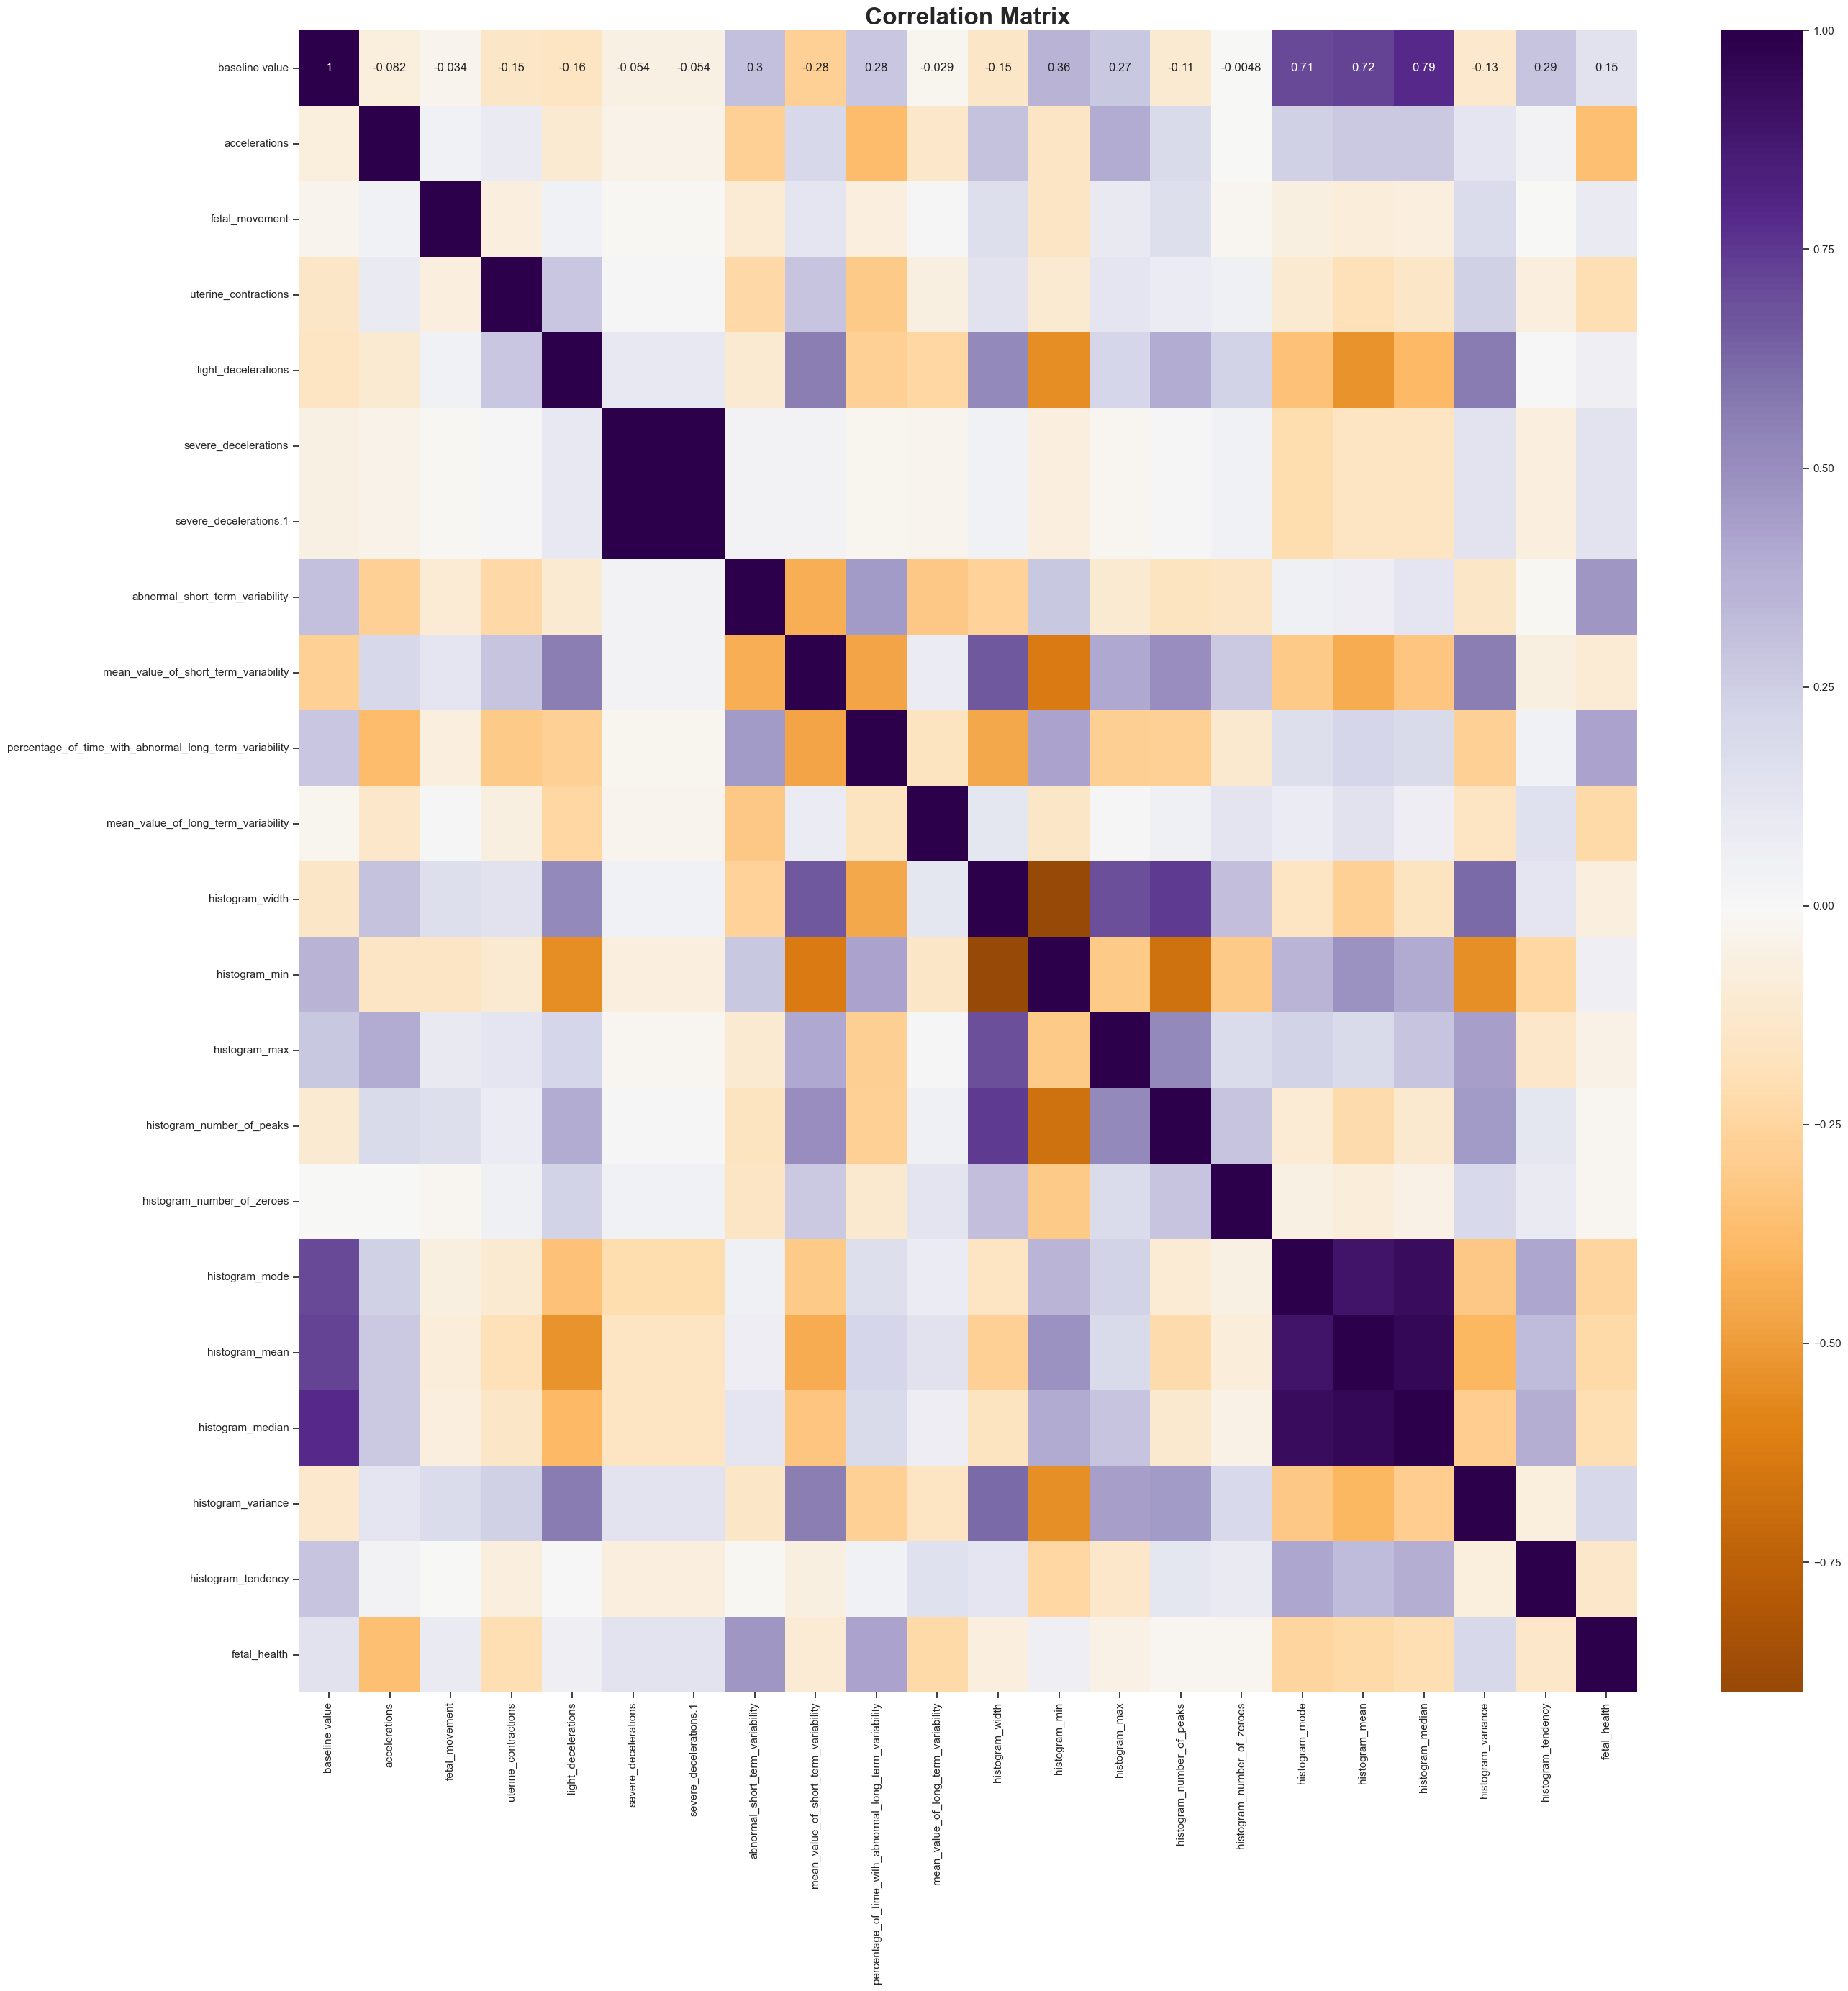

In [16]:
# Correlation matrix for all features
correlation_matrix = data.corr()

plt.figure(figsize=(30, 30))
sns.heatmap(correlation_matrix, annot=True, cmap='PuOr', center=0)

plt.title('Correlation Matrix',
          fontsize=24,
          fontweight='bold')

Text(0.5, 1.0, 'Correlation of Numerical Features with fetal_health')

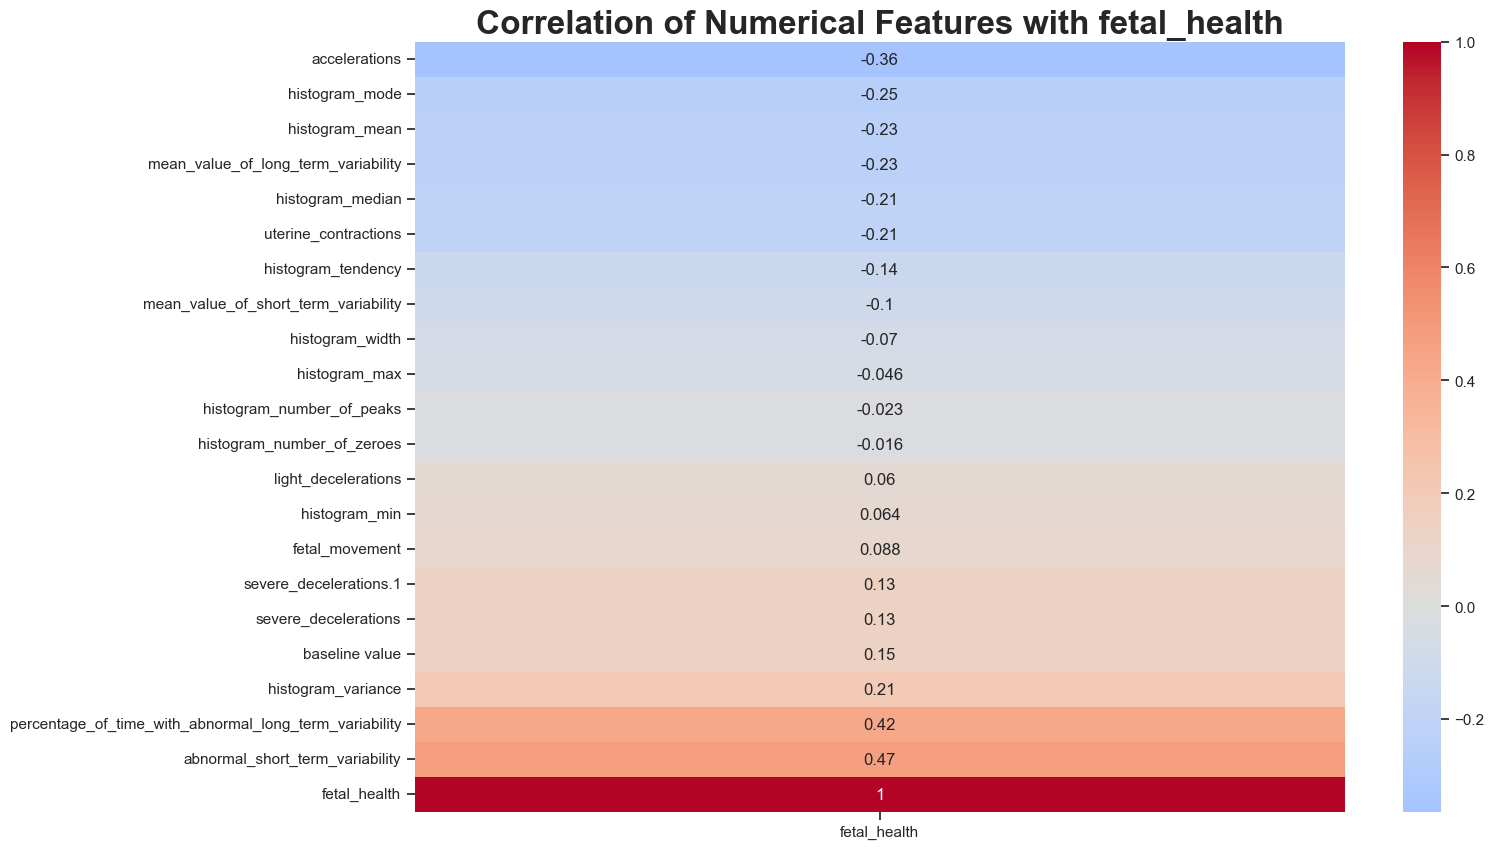

In [17]:
# Correlation of numerical features with fetal_health
correlation_matrix = data.corr()['fetal_health']

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix.sort_values().to_frame(), annot=True, cmap='coolwarm', center=0)

plt.title("Correlation of Numerical Features with fetal_health",
                    fontsize=24,
                    fontweight="bold")

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating inste

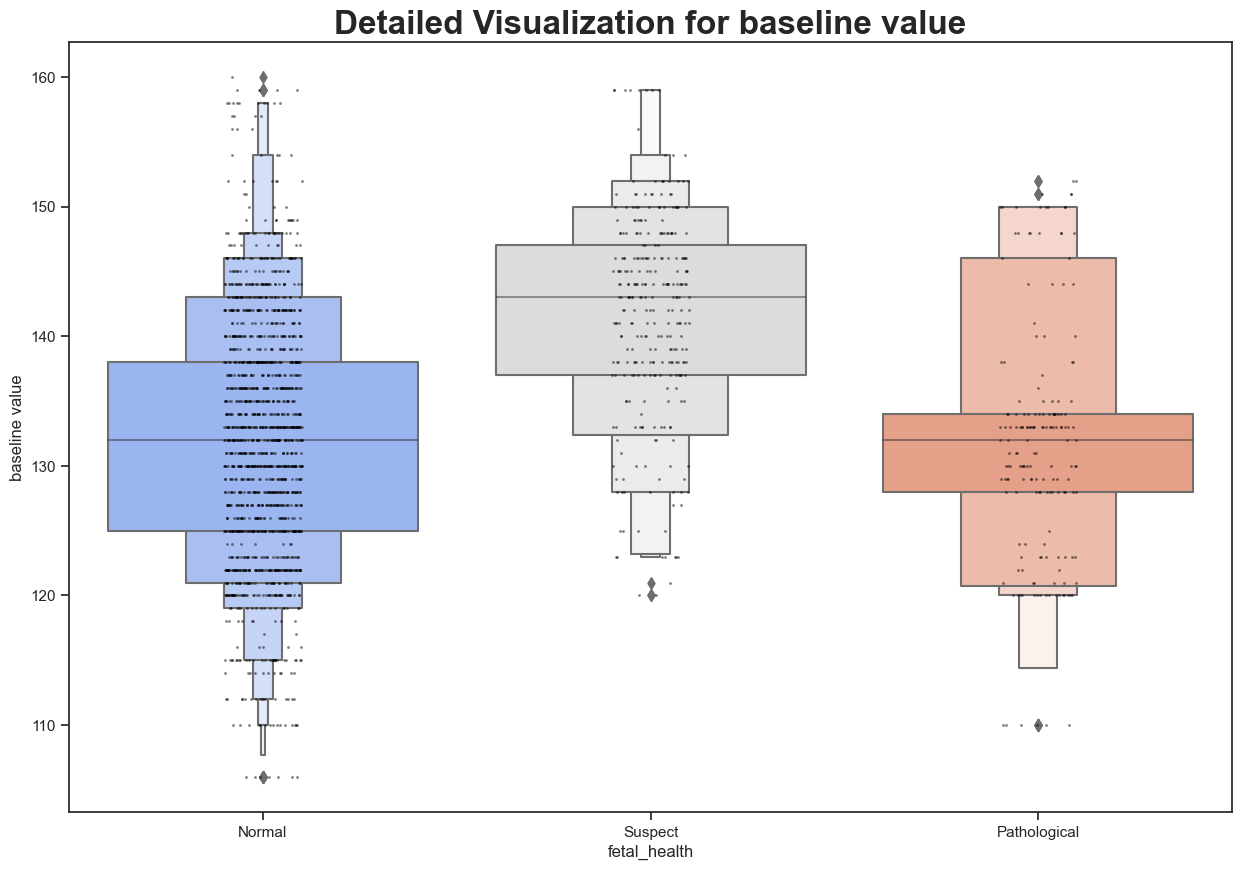

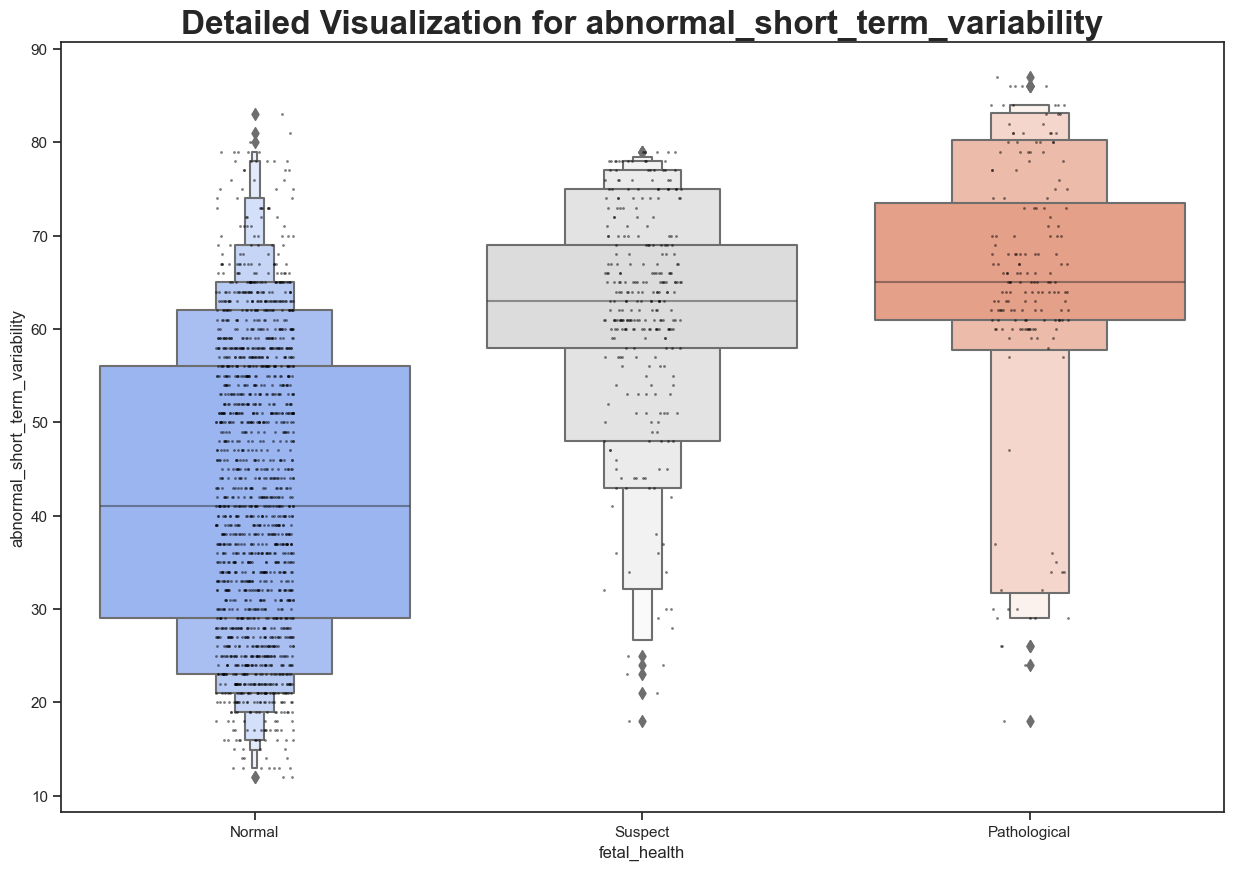

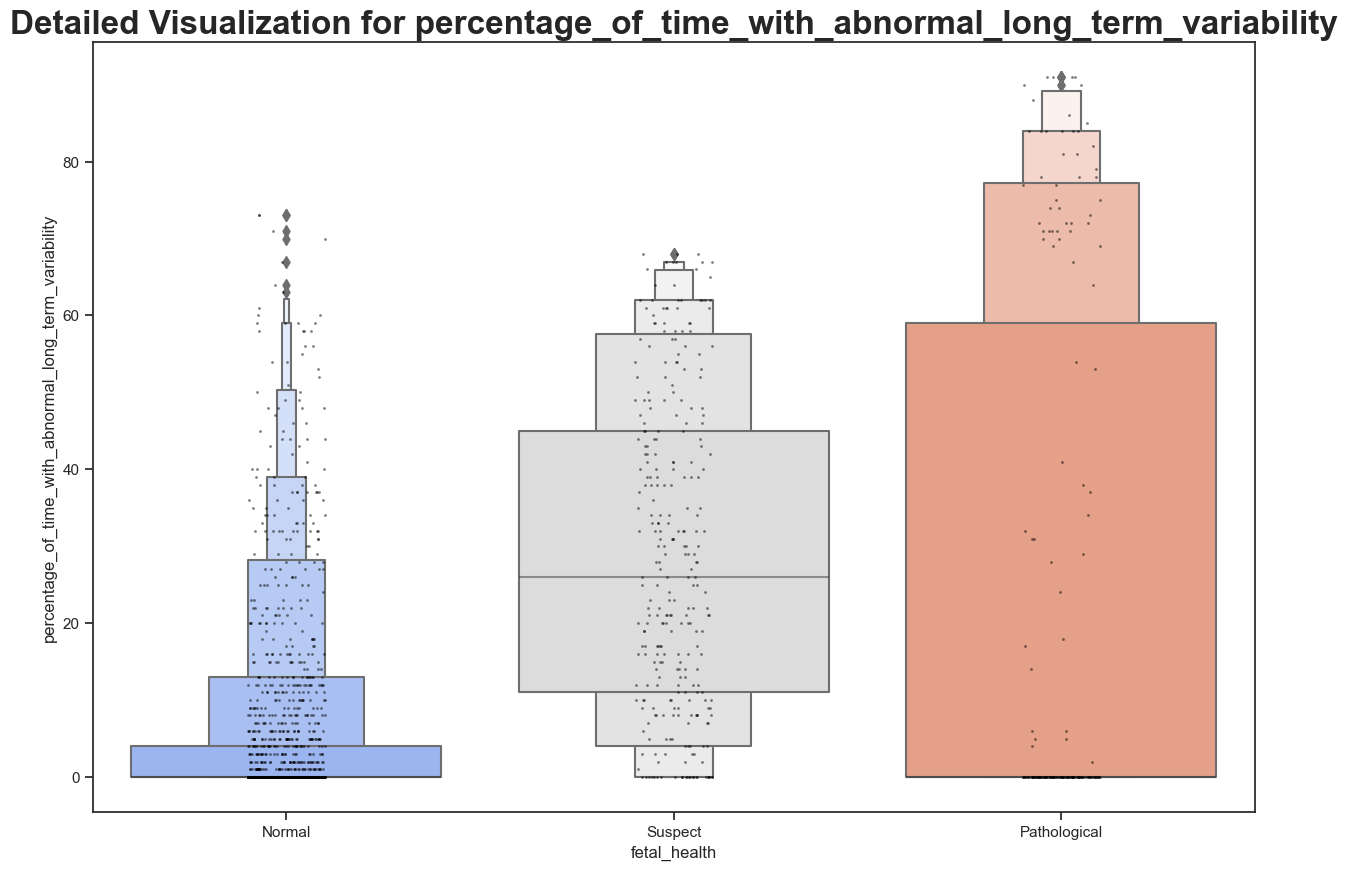

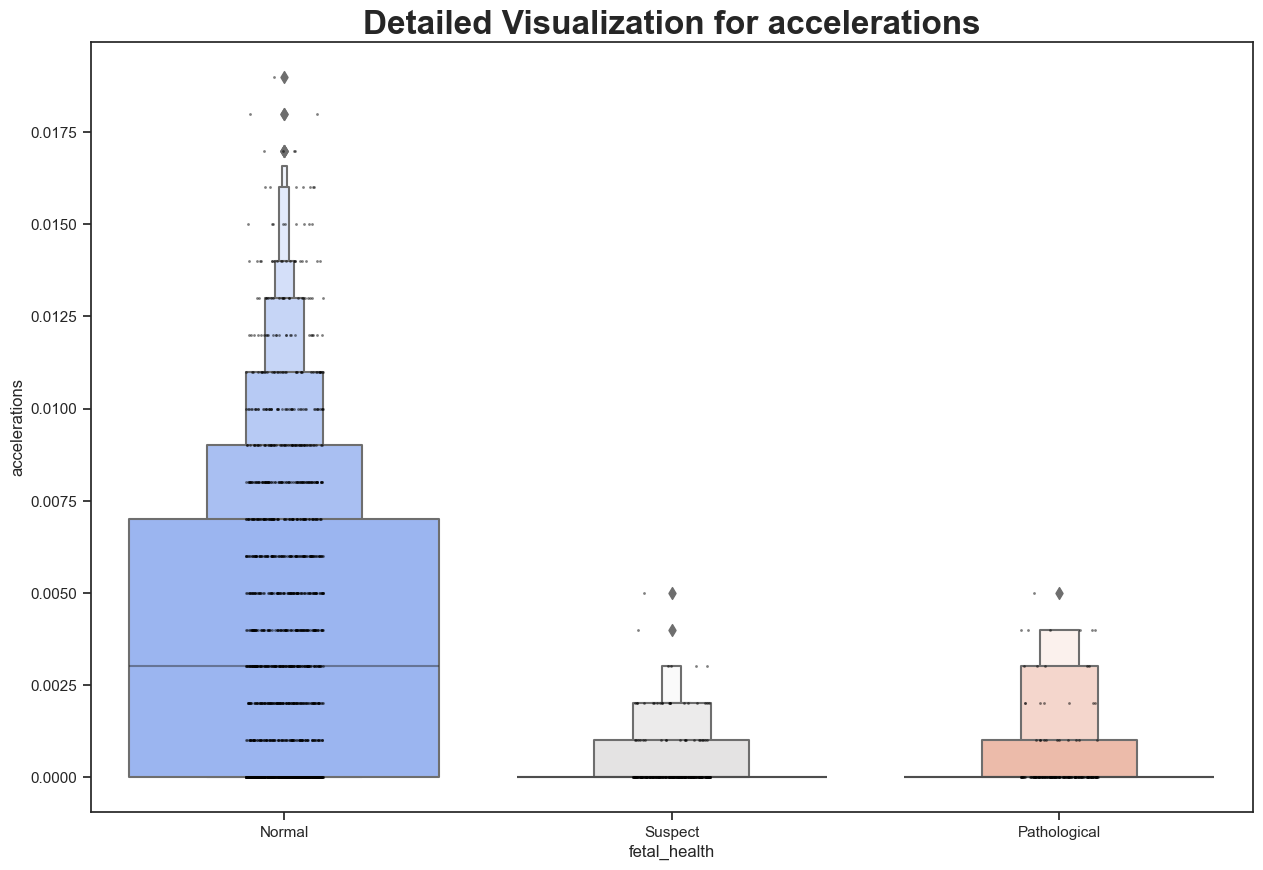

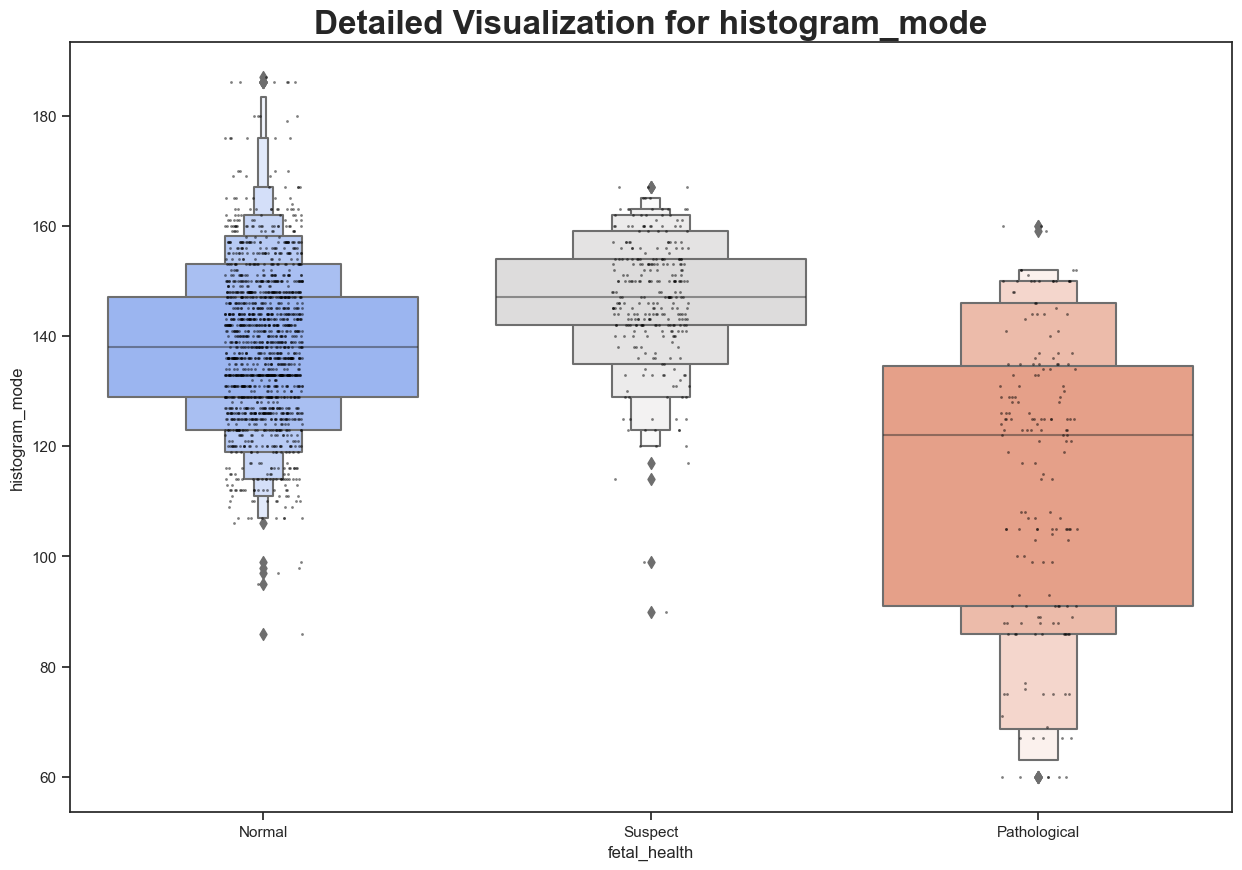

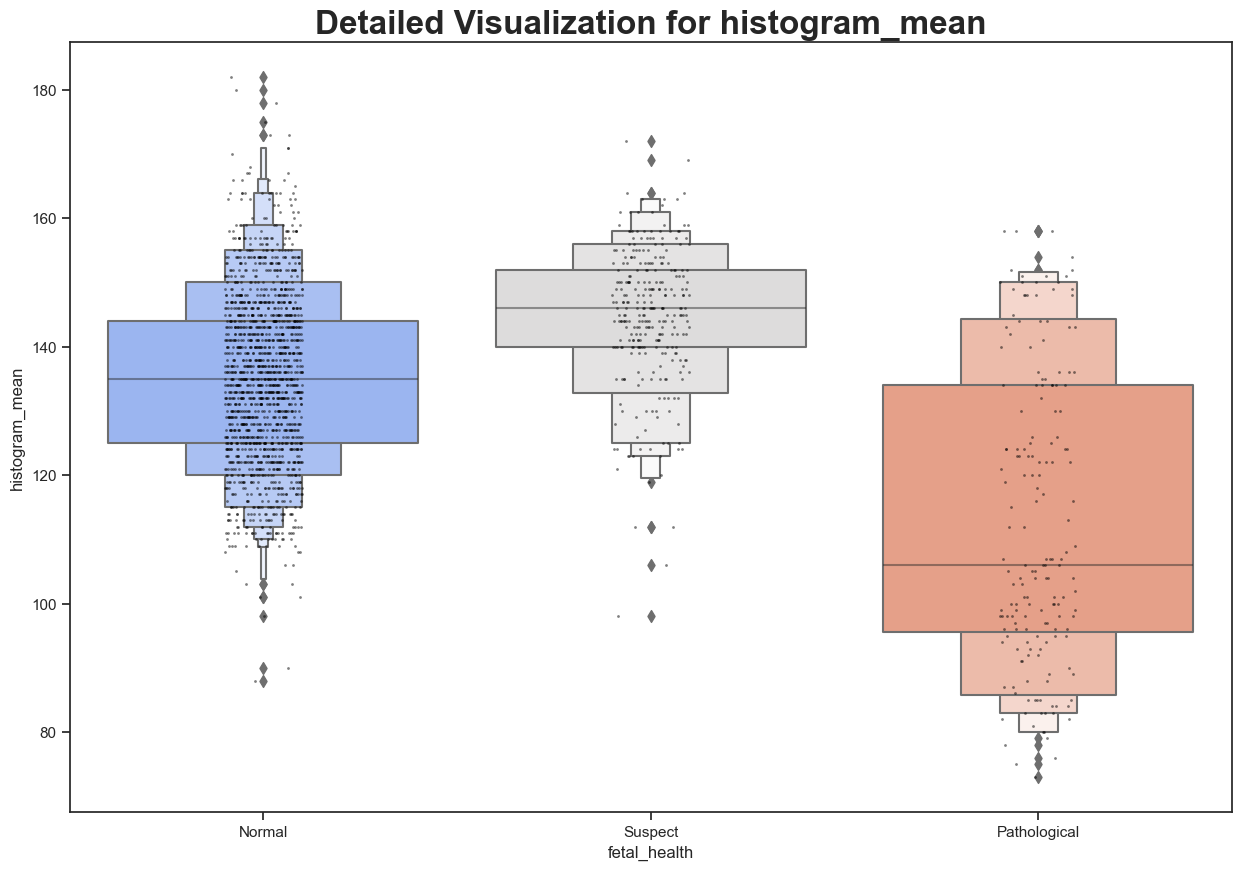

In [18]:
# Columns for detailed visualization
cols = ['baseline value','abnormal_short_term_variability', 'percentage_of_time_with_abnormal_long_term_variability','accelerations', 'histogram_mode', 'histogram_mean']

# Create strip plots and boxen plots for selected columns
for i in cols:
    plt.figure(figsize=(15, 10))
    sns.stripplot(x=data["fetal_health"], y=data[i], color="black", alpha=0.5, size=2, jitter=True, dodge=True)
    sns.boxenplot(x=data["fetal_health"], y=data[i], palette='coolwarm')
    
    plt.title(f'Detailed Visualization for {i}',
              fontsize=24,
              fontweight='bold')
    plt.xticks([0, 1, 2], ['Normal','Suspect','Pathological'])

In [19]:
# Feature selection with K-Best
X = data.drop(['fetal_health'], axis=1)
Y = data['fetal_health']

bestfeatures = SelectKBest(score_func=f_classif, k='all')

fit = bestfeatures.fit(X, Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [20]:
# Concatenate two dataframes for better understanding
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Feature', 'Score']

# Sort features based on importance scores
featureScores = featureScores.sort_values(by='Score', ascending=False)
print(featureScores)

                                              Feature       Score
7                     abnormal_short_term_variability  337.703020
9   percentage_of_time_with_abnormal_long_term_var...  335.386156
17                                     histogram_mean  298.759569
16                                     histogram_mode  276.382795
18                                   histogram_median  249.699523
1                                       accelerations  194.618345
19                                 histogram_variance  150.955827
0                                      baseline value  137.833999
8                mean_value_of_short_term_variability  118.050463
3                                uterine_contractions   93.647474
12                                      histogram_min   86.468440
10                mean_value_of_long_term_variability   69.418940
4                                 light_decelerations   66.750344
11                                    histogram_width   54.215605
20        

Text(0.5, 1.0, 'Feature Importance')

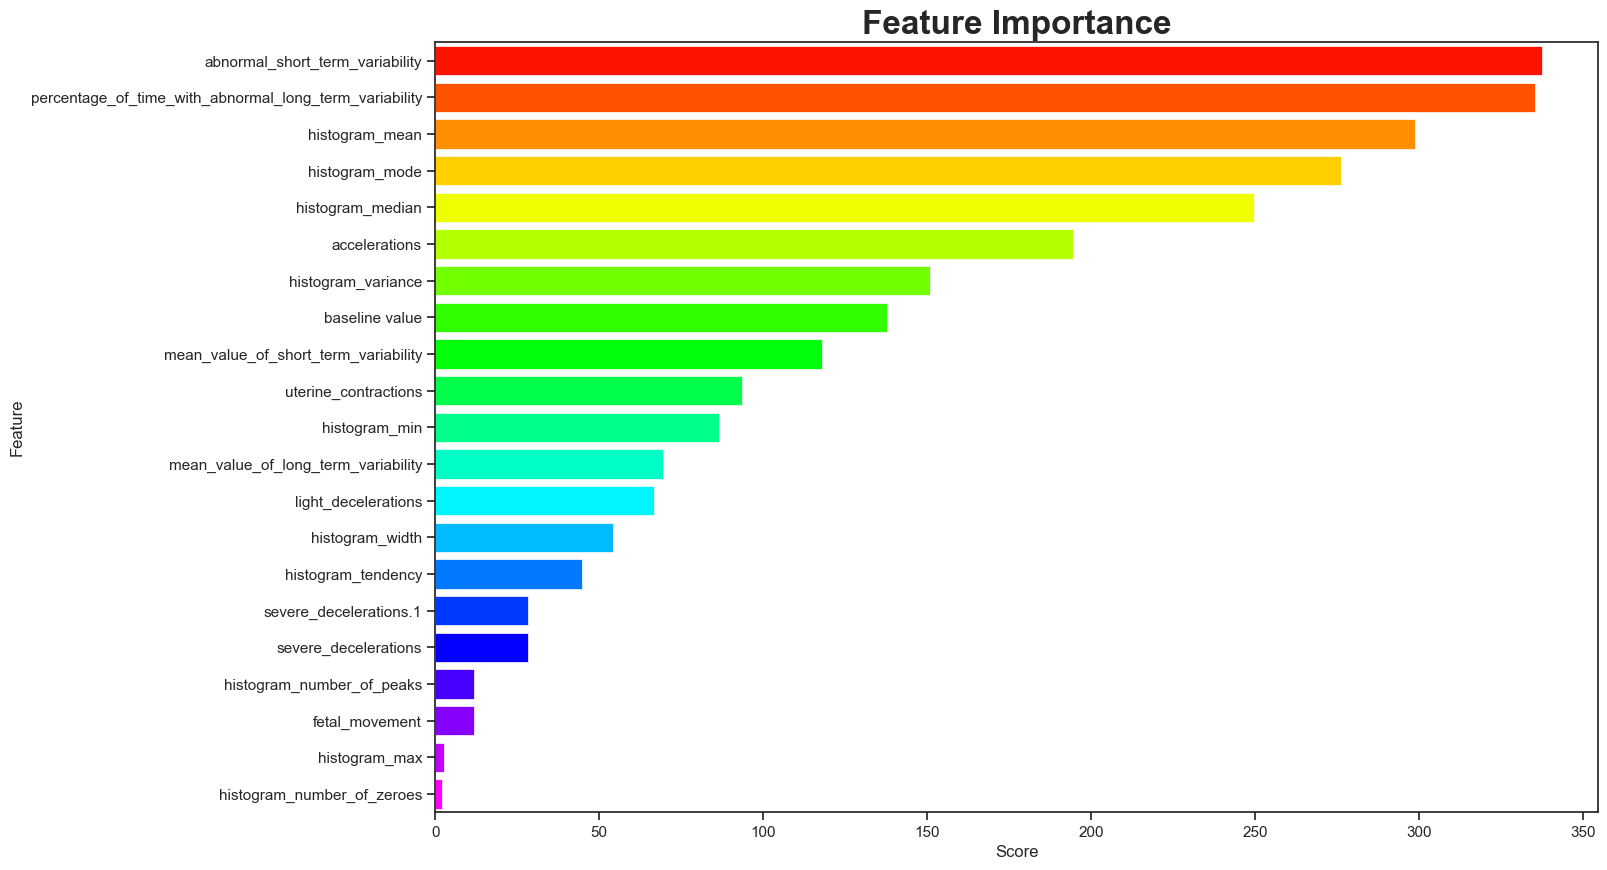

In [21]:
# Visualize the importance scores
fig, ax = plt.subplots(figsize=(15, 10))
plot = sns.barplot(data=featureScores, x='Score', y='Feature', palette='gist_rainbow', linewidth=0.5, saturation=2,
                   orient='h')

plt.title('Feature Importance',
          fontsize=24,
          fontweight='bold')

In [22]:
# Finding the least correlated features with fetal health
low_score_features = featureScores[featureScores['Score'] < 15]
print(low_score_features)

                       Feature      Score
14   histogram_number_of_peaks  11.726828
2               fetal_movement  11.700712
13               histogram_max   2.523350
15  histogram_number_of_zeroes   2.134901


In [23]:
# Dropping the features that are below the threshold
features_to_drop = ['histogram_number_of_peaks', 'fetal_movement', 'histogram_max', 'histogram_number_of_zeroes']
data = data.drop(features_to_drop, axis=1)

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

(array([-50.,   0.,  50., 100., 150., 200., 250., 300.]),
 [Text(0, -50.0, '−50'),
  Text(0, 0.0, '0'),
  Text(0, 50.0, '50'),
  Text(0, 100.0, '100'),
  Text(0, 150.0, '150'),
  Text(0, 200.0, '200'),
  Text(0, 250.0, '250'),
  Text(0, 300.0, '300')])

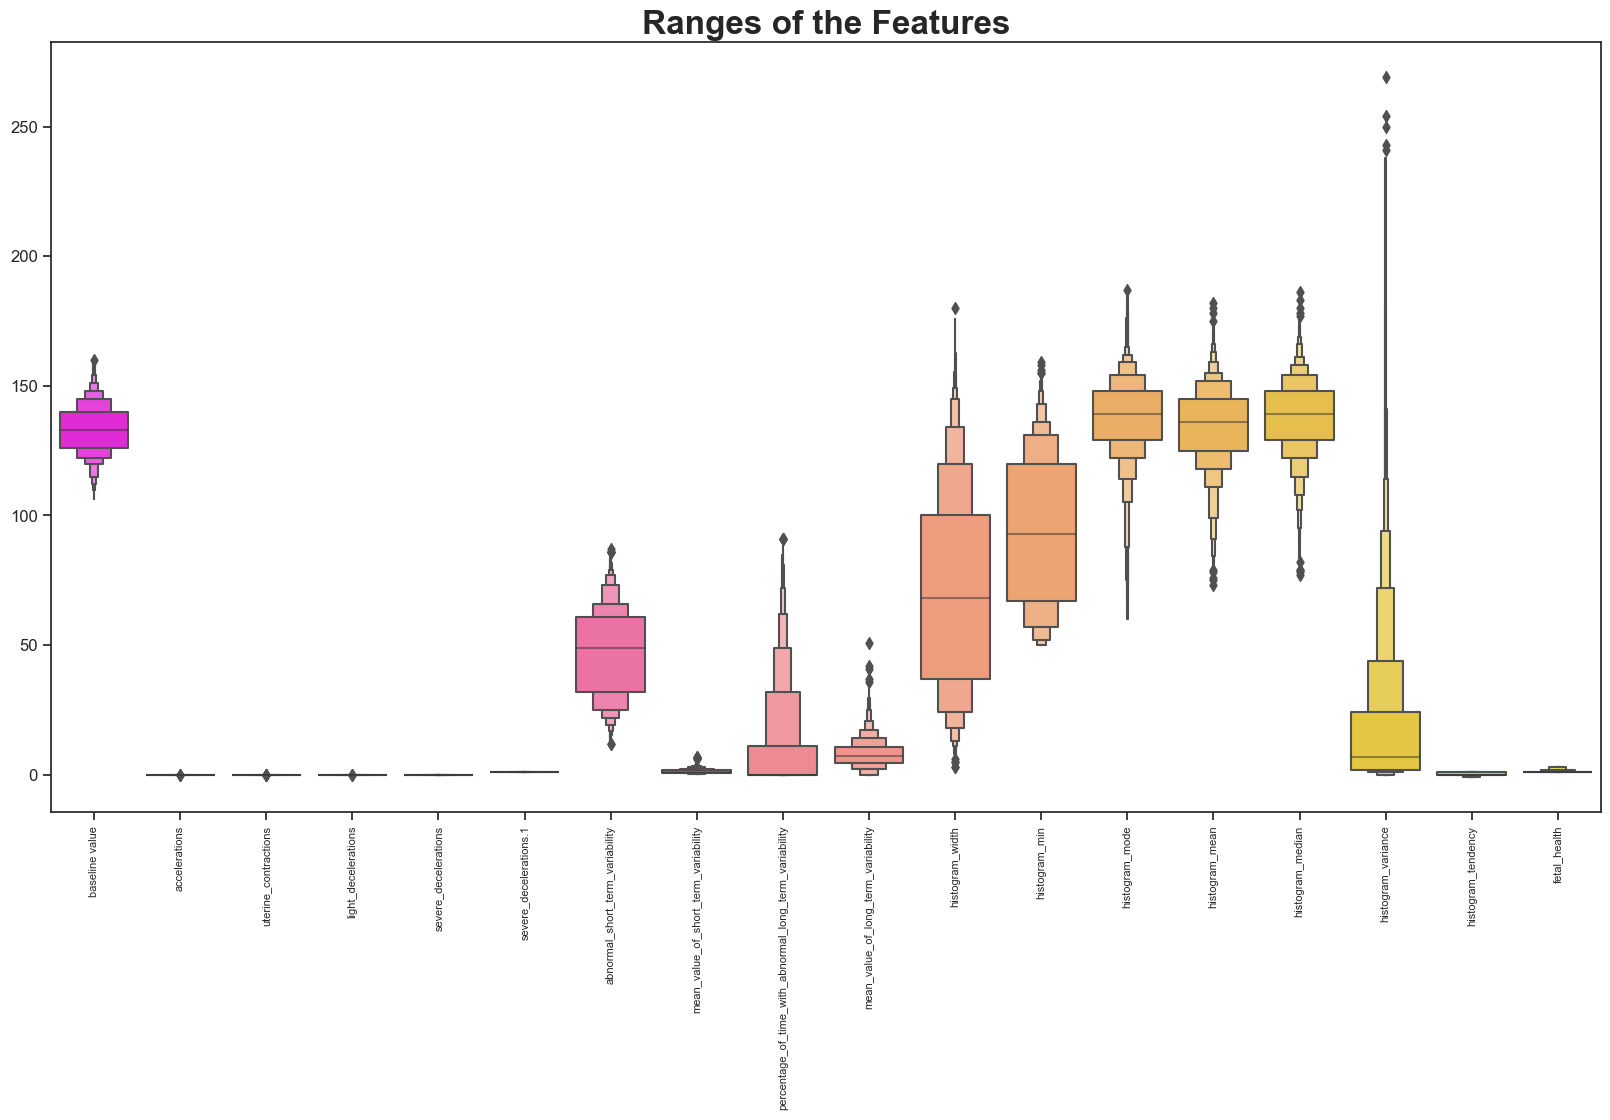

In [24]:
# Ranges of the features
plt.figure(figsize=(20, 10))
sns.boxenplot(data=data, palette='spring')

plt.title('Ranges of the Features',
          fontsize=24,
          fontweight='bold')
plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=12)

In [25]:
# Splitting data into features (X) and outcomes (y)
X = data.drop(["fetal_health"], axis=1)
y = data["fetal_health"]

In [26]:
# Set up a standard scaler for the features
col_names = list(X.columns)
s_scaler = preprocessing.StandardScaler()

X_df = s_scaler.fit_transform(X)
X_df = pd.DataFrame(X_df, columns=col_names)

In [27]:
# Description of the standardized features
X_df.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2113.0,-1.143325e-15,1.000237,-2.776252,-0.742724,-0.030989,0.680746,2.714274
accelerations,2113.0,6.725440e-18,1.000237,-0.823776,-0.823776,-0.307036,0.726444,4.085254
uterine_contractions,2113.0,8.070528e-17,1.000237,-1.492245,-0.811961,0.208464,0.888747,3.609880
light_decelerations,2113.0,-8.070528e-17,1.000237,-0.641203,-0.641203,-0.641203,0.370643,4.418027
severe_decelerations,2113.0,-6.725440e-18,1.000237,-0.057653,-0.057653,-0.057653,-0.057653,17.345234
severe_decelerations.1,2113.0,1.388080e-12,1.000237,-0.057653,-0.057653,-0.057653,-0.057653,17.345234
abnormal_short_term_variability,2113.0,-1.345088e-17,1.000237,-2.037640,-0.873069,0.116815,0.815557,2.329499
mean_value_of_short_term_variability,2113.0,-4.035264e-17,1.000237,-1.283731,-0.718221,-0.152712,0.412798,6.407199
percentage_of_time_with_abnormal_long_term_variability,2113.0,2.690176e-17,1.000237,-0.534294,-0.534294,-0.534294,0.065725,4.429504
mean_value_of_long_term_variability,2113.0,1.076070e-16,1.000237,-1.450150,-0.633328,-0.136131,0.467607,7.552654


C:\Users\HP\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

(array([-10.,  -5.,   0.,   5.,  10.,  15.,  20.]),
 [Text(0, -10.0, '−10'),
  Text(0, -5.0, '−5'),
  Text(0, 0.0, '0'),
  Text(0, 5.0, '5'),
  Text(0, 10.0, '10'),
  Text(0, 15.0, '15'),
  Text(0, 20.0, '20')])

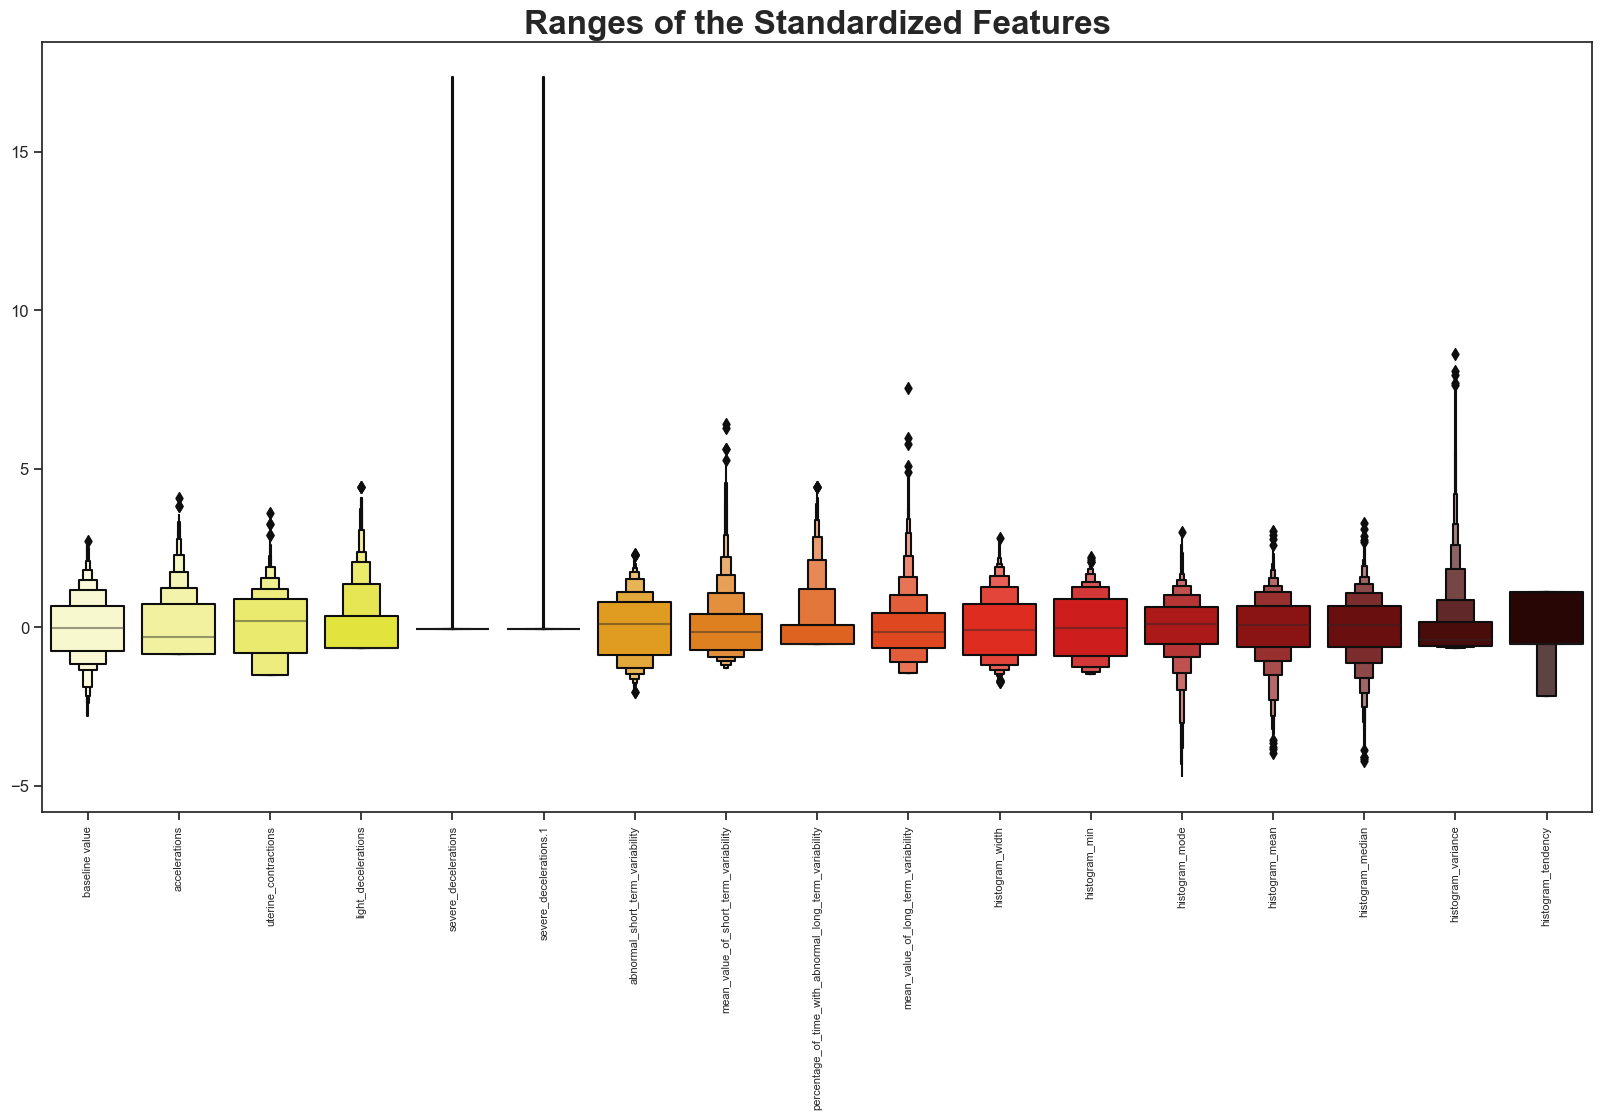

In [28]:
# Plot the standardized features
plt.figure(figsize=(20, 10))
sns.boxenplot(data=X_df, palette='hot_r')

plt.title('Ranges of the Standardized Features',
          fontsize=24,
          fontweight='bold')
plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=12)

In [29]:
# Split the dataset into training and test set
X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1690, 17), (423, 17), (1690,), (423,))

In [30]:
# K-Nearest-Neighbors Classification
knn = KNeighborsClassifier()

In [31]:
# Parameter tuning with GridSearchCV
param_knn = {
    'n_neighbors': list(range(1, 31)),
    'p': (1, 2),
    'weights': ('uniform', 'distance'),
    'metric': ('minkowski', 'chebyshev')}

In [32]:
# Fitting the model for GridSearchCV
grid_search_knn = GridSearchCV(knn, param_knn, cv=10, n_jobs=-1, scoring='accuracy')
grid_search_knn.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ('minkowski', 'chebyshev'),
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'p': (1, 2), 'weights': ('uniform', 'distance')},
             scoring='accuracy')

In [33]:
# Best parameters for KNN
grid_search_knn.best_params_

{'metric': 'minkowski', 'n_neighbors': 4, 'p': 1, 'weights': 'distance'}

In [34]:
# Fitting KNN with the best parameters
knn = KNeighborsClassifier(n_neighbors=4, metric='minkowski', p=1, weights='distance')
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4, p=1, weights='distance')

In [35]:
# Prediction and accuracy
y_pred = knn.predict(X_test)
accuracy_score(y_test, y_pred) * 100

92.67139479905437

In [36]:
# Show 20 predicted and actual values - KNN
pd.DataFrame({'Prediction': y_pred[:20], 'Actual': y_test[:20]})

,Prediction,Actual
601,1,2
2005,1,1
427,1,1
291,2,2
197,2,2
800,2,2
865,1,1
1487,1,1
1988,1,1
1640,1,1


In [37]:
# KNN Classification report (precision, recall, f1-score, support, accuracy)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.96      0.96      0.96       341
           2       0.75      0.72      0.74        54
           3       0.89      0.89      0.89        28

    accuracy                           0.93       423
   macro avg       0.87      0.86      0.86       423
weighted avg       0.93      0.93      0.93       423



[Text(0, 0.5, 'Normal'), Text(0, 1.5, 'Suspect'), Text(0, 2.5, 'Pathological')]

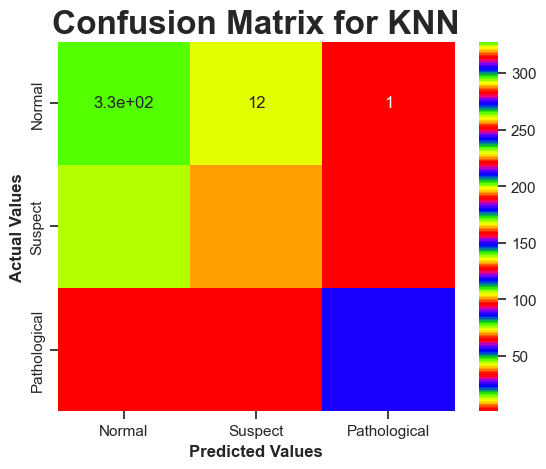

In [38]:
# Confusion matrix for KNN
ax = plt.subplot()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, ax=ax, cmap='prism')

ax.set_xlabel('Predicted Values',
              fontweight='bold')
ax.set_ylabel('Actual Values',
              fontweight='bold')
ax.set_title('Confusion Matrix for KNN',
             fontsize=24,
             fontweight='bold')
ax.xaxis.set_ticklabels(['Normal', 'Suspect', 'Pathological'])
ax.yaxis.set_ticklabels(['Normal', 'Suspect', 'Pathological'])

In [39]:
# Support Vector Classifier
svc = SVC()

In [40]:
# Parameter tuning with GridSearchCV
param_grid_svc = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto', 0.001, 0.01],
    'kernel': ['linear', 'rbf', 'poly'],
}

In [41]:
grid_search_svc = GridSearchCV(SVC(random_state=42), param_grid_svc, cv=10)
grid_search_svc.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(random_state=42),
             param_grid={'C': [0.1, 1, 10],
                         'gamma': ['scale', 'auto', 0.001, 0.01],
                         'kernel': ['linear', 'rbf', 'poly']})

In [42]:
# Best parameters for SVC
best_params_for_svc = grid_search_svc.best_params_
print(best_params_for_svc)

{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


In [43]:
# Fitting SVC with the best parameters
svc_classifier = SVC(**best_params_for_svc, random_state=42)
svc_classifier.fit(X_train, y_train)

SVC(C=10, random_state=42)

In [44]:
# Prediction and accuracy
y_pred_svc = svc_classifier.predict(X_test)
accuracy_score(y_test, y_pred_svc) * 100

95.50827423167848

In [45]:
# Show 20 predicted and actual values - SVC
pd.DataFrame({'Prediction': y_pred_svc[:20], 'Actual': y_test[:20]})

,Prediction,Actual
601,2,2
2005,1,1
427,1,1
291,2,2
197,2,2
800,2,2
865,1,1
1487,1,1
1988,1,1
1640,1,1


[Text(0, 0.5, 'Normal'), Text(0, 1.5, 'Suspect'), Text(0, 2.5, 'Pathological')]

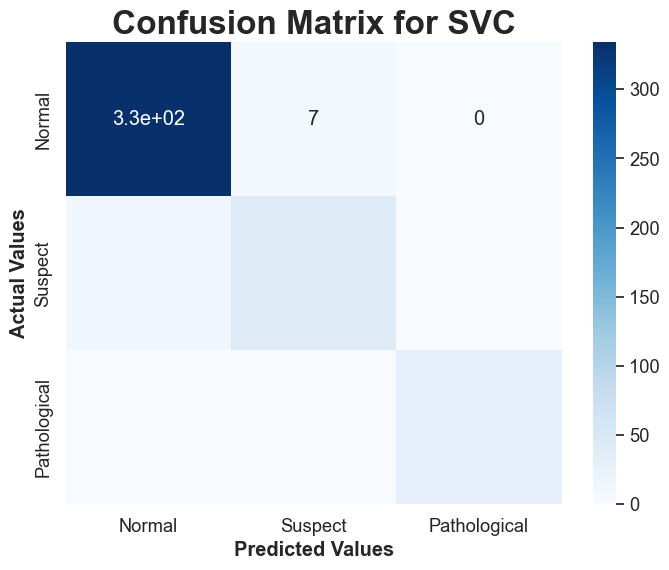

In [48]:
# Confusion matrix for SVC
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)

ax = plt.subplot()
sns.heatmap(confusion_matrix(y_test, y_pred_svc), annot=True, ax=ax, cmap='Blues')

ax.set_xlabel('Predicted Values',
              fontweight='bold')
ax.set_ylabel('Actual Values',
              fontweight='bold')
ax.set_title('Confusion Matrix for SVC',
             fontsize=24,
             fontweight='bold')
ax.xaxis.set_ticklabels(['Normal', 'Suspect', 'Pathological'])
ax.yaxis.set_ticklabels(['Normal', 'Suspect', 'Pathological'])

In [49]:
# SVC Classification report (precision, recall, f1-score, support, accuracy)
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           1       0.97      0.98      0.97       341
           2       0.86      0.78      0.82        54
           3       1.00      1.00      1.00        28

    accuracy                           0.96       423
   macro avg       0.94      0.92      0.93       423
weighted avg       0.95      0.96      0.95       423



In [59]:
# Training, test scores and margin of error of the models
pd.DataFrame({
    'Model': ['KNN', 'SVC'],
    'Training Score': [knn.score(X_train, y_train), svc_classifier.score(X_train, y_train)],
    'Test Score': [accuracy_score(y_test, y_pred), accuracy_score(y_test, y_pred_svc)],
    'Error': [knn.score(X_train, y_train) - accuracy_score(y_test, y_pred), svc_classifier.score(X_train, y_train) - accuracy_score(y_test, y_pred_svc)]
})

,Model,Training Score,Test Score,Error
0,KNN,0.999408,0.926714,0.072694
1,SVC,0.957988,0.955083,0.002905


In [67]:
# Function to plot learning curve for models
def plot_learning_curve(estimator, title, X, y, ylim=None,
                        n_jobs=None, train_sizes=np.linspace(0.1, 1.0, 5)):
    plt.figure(figsize=(10, 6))
    plt.grid(True)
    plt.title(title,
              fontsize=24,
              fontweight='bold')
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
    estimator, X, y, cv=10, n_jobs=n_jobs, train_sizes=train_sizes,
        scoring='accuracy', shuffle=True, random_state=42)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="b")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="b",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    plt.tight_layout()
    return plt

<module 'matplotlib.pyplot' from 'C:\\Users\\HP\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

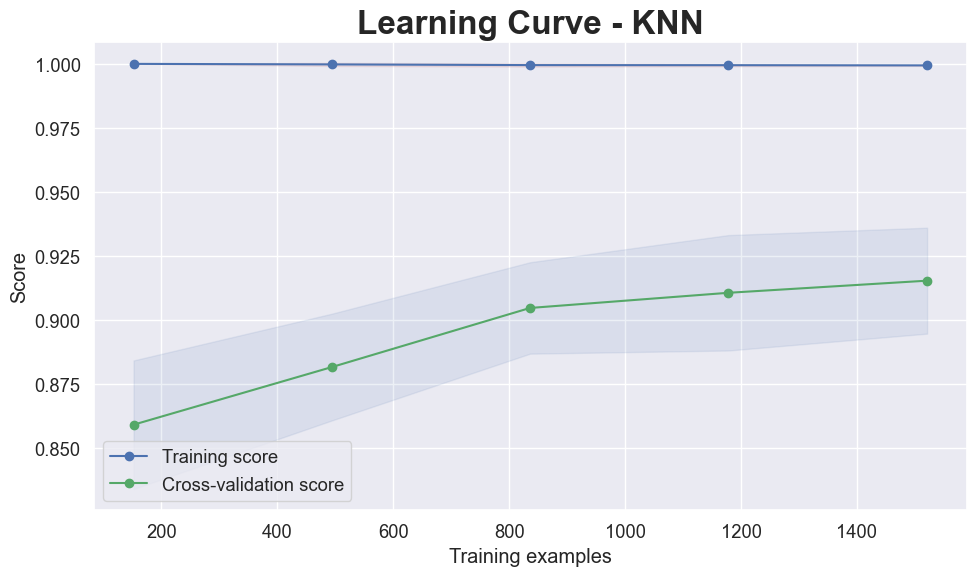

In [68]:
# Plot learning curves for KNN
plot_learning_curve(grid_search_knn.best_estimator_, "Learning Curve - KNN", X_train, y_train, n_jobs=-1)

<module 'matplotlib.pyplot' from 'C:\\Users\\HP\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

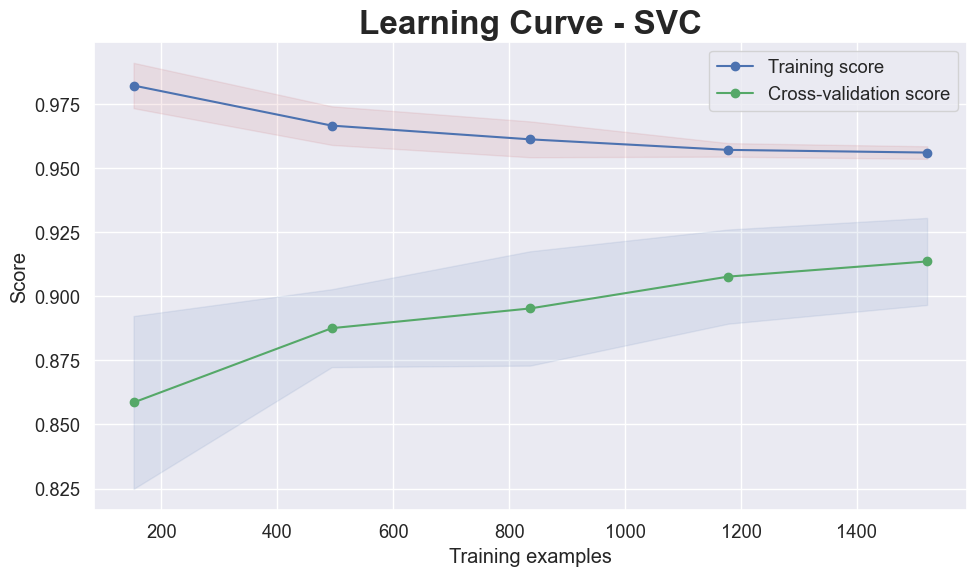

In [69]:
# Plot learning curves for SVC
plot_learning_curve(grid_search_svc.best_estimator_, "Learning Curve - SVC", X_train, y_train, n_jobs=-1)